In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


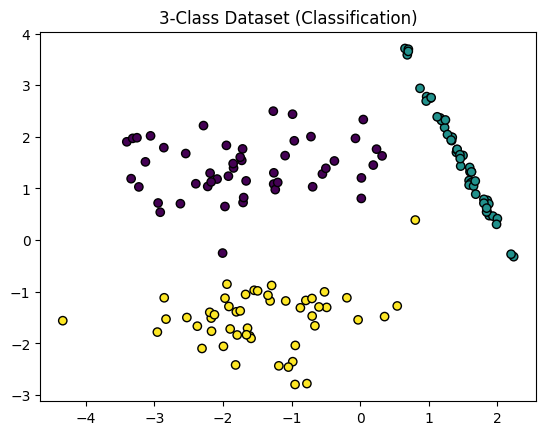

In [2]:
# Generate Classification Dataset with 3 Classes
np.random.seed(42)
X, Y = make_classification(
    n_samples=150,
    n_features=2,
    n_classes=3,
    n_clusters_per_class=1,
    n_redundant=0,
    n_informative=2,
    class_sep=1.5,
    random_state=42
)
Y = Y.astype(int)
Y_one_hot = np.zeros((Y.size, Y.max() + 1))
Y_one_hot[np.arange(Y.size), Y] = 1

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("3-Class Dataset (Classification)")
plt.show()


In [3]:
# Neural Network Class
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 16
        hiddenLayerNeurons2 = 8
        outLayerNeurons = 3

        self.learning_rate = 0.01
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_OH = np.random.randn(hiddenLayerNeurons2, outLayerNeurons)

    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI)
        self.hidden_output1 = self.relu(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.relu(hidden_input2)

        output_input = np.dot(self.hidden_output2, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error2 = output_delta.dot(self.W_OH.T) * self.relu(self.hidden_output2, der=True)
        hidden_delta2 = self.learning_rate * hidden_error2

        hidden_error1 = hidden_delta2.dot(self.W_H2.T) * self.relu(self.hidden_output1, der=True)
        hidden_delta1 = self.learning_rate * hidden_error1

        self.W_HI += X.T.dot(hidden_delta1)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_OH += self.hidden_output2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

Epoch 0: Loss = 0.3550
Epoch 20: Loss = 0.0144
Epoch 40: Loss = 0.0098
Epoch 60: Loss = 0.0084
Epoch 80: Loss = 0.0073


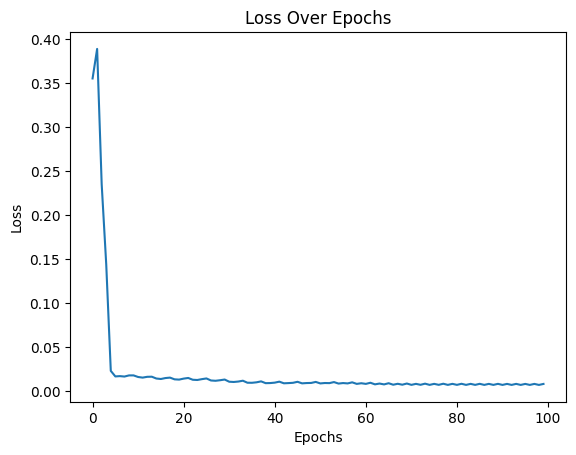

In [4]:
# Initialize and Train the Network
NN = NeuralNetwork()
errors = []

for epoch in range(100):  # Number of epochs
    output = NN.feedForward(X)
    loss = np.mean(np.square(Y_one_hot - output))
    errors.append(loss)
    NN.train(X, Y_one_hot)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Plot Loss Over Epochs
plt.plot(errors)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

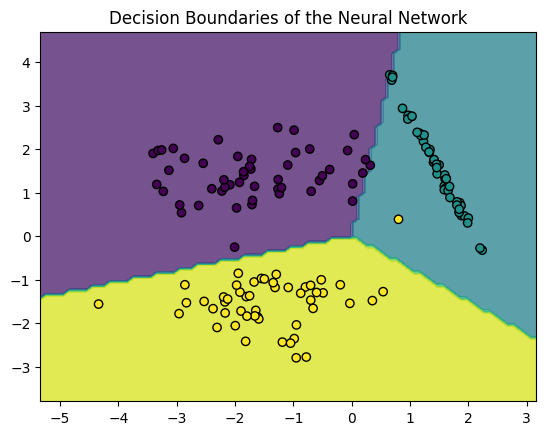

In [5]:
# Visualize Decision Boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("Decision Boundaries of the Neural Network")
plt.show()